In [20]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

## Importing the dataset

In [2]:
df_train = pd.read_csv('../input/multiclass-text-classification-dataset/data_train.csv')
df_test = pd.read_csv('../input/multiclass-text-classification-dataset/data_test.csv')

In [3]:
df_train.head()

Emotion                                               Text
0  neutral   There are tons of other paintings that I thin...
1  sadness  Yet the dog had grown old and less capable , a...
2     fear  When I get into the tube or the train without ...
3     fear  This last may be a source of considerable disq...
4    anger  She disliked the intimacy he showed towards so...

In [4]:
df_test.head()

Emotion                                               Text
0  sadness  I experienced this emotion when my grandfather...
1  neutral   when I first moved in , I walked everywhere ....
2    anger  ` Oh ! " she bleated , her voice high and rath...
3     fear  However , does the right hon. Gentleman recogn...
4  sadness  My boyfriend didn't turn up after promising th...

In [5]:
df_train.describe()

Emotion     Text
count      7934     7934
unique        5     7265
top     sadness   Yes . 
freq       1641       58

In [6]:
df_test.describe()

Emotion     Text
count     3393     3393
unique       5     3202
top        joy   Why ? 
freq       707       21

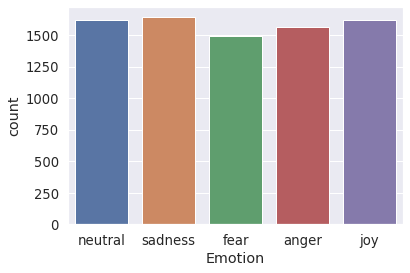

In [7]:
sns.set(style = 'darkgrid', font_scale = 1.2)
sns.countplot(df_train.Emotion)

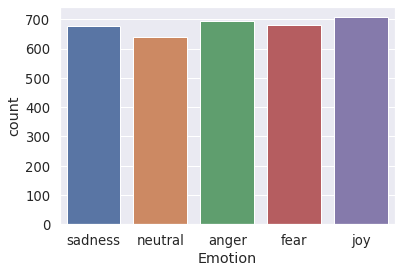

In [8]:
sns.countplot(df_test.Emotion)

In [9]:
# check any missing values
df_train.isna().sum()

Emotion    0
Text       0
dtype: int64

In [10]:
df_test.isna().sum()

Emotion    0
Text       0
dtype: int64

## Data Cleaning

In [11]:
def data_clean(data):
    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)

    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    return data

In [21]:
data = pd.concat([df_train, df_test])
data["Text"] = data["Text"].apply(data_clean)

## Wordcloud for sadness

In [ ]:
sns.set(style = "white" , font_scale = 1.2)

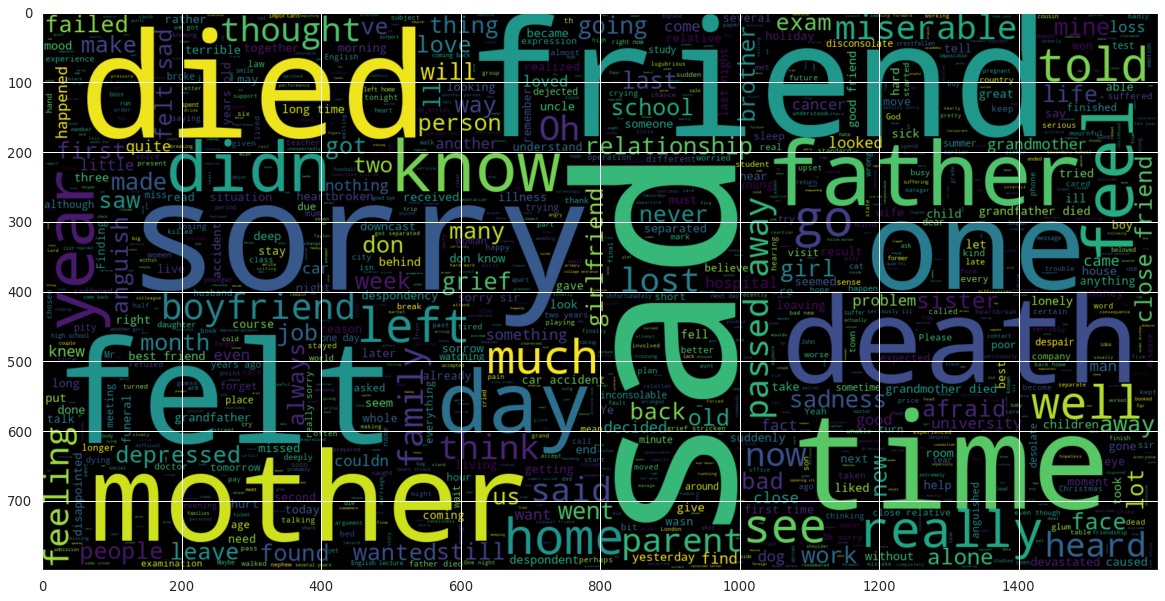

In [23]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Emotion == "sadness"].Text))
plt.imshow(wc , interpolation = 'bilinear')

## Wordcloud for neutral

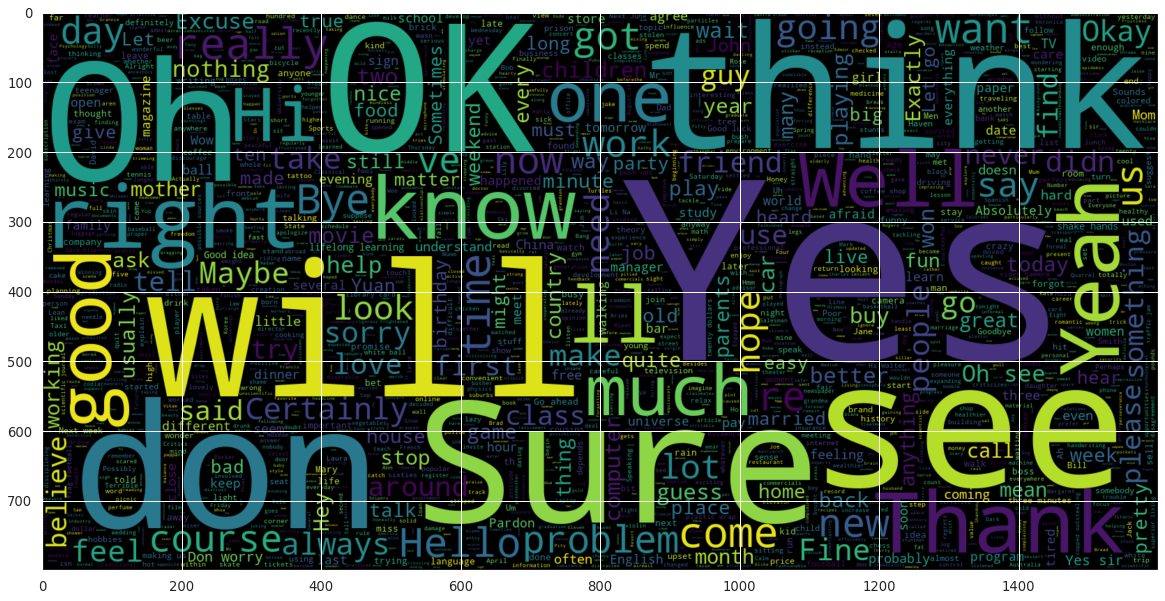

In [24]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Emotion == "neutral"].Text))
plt.imshow(wc , interpolation = 'bilinear')

## Wordcloud for anger

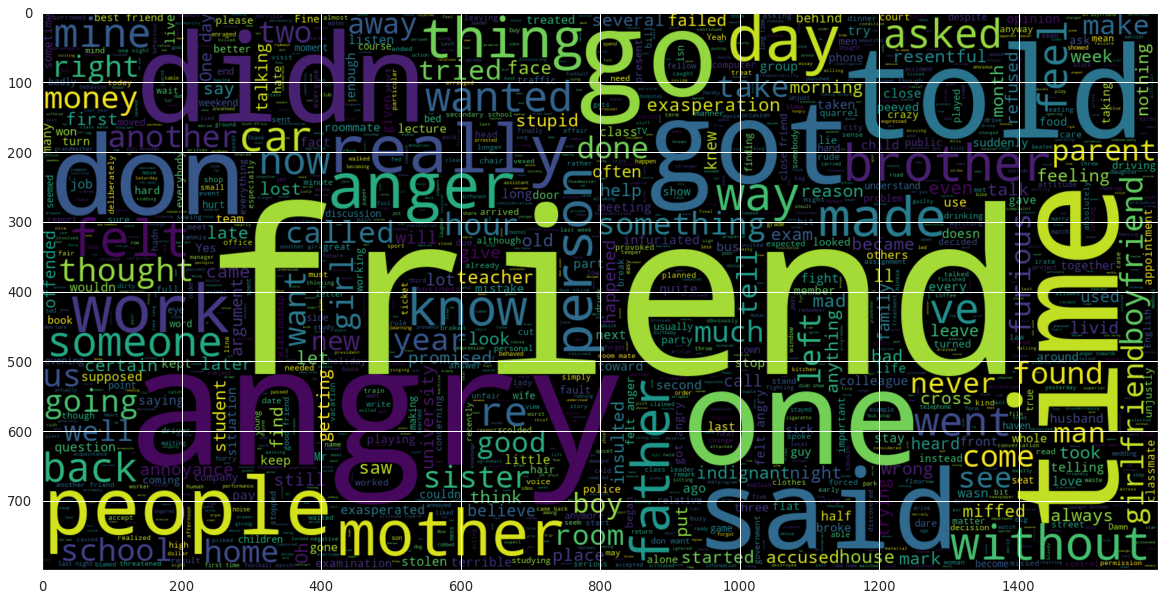

In [25]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Emotion == "anger"].Text))
plt.imshow(wc , interpolation = 'bilinear')

## Wordcloud for fear

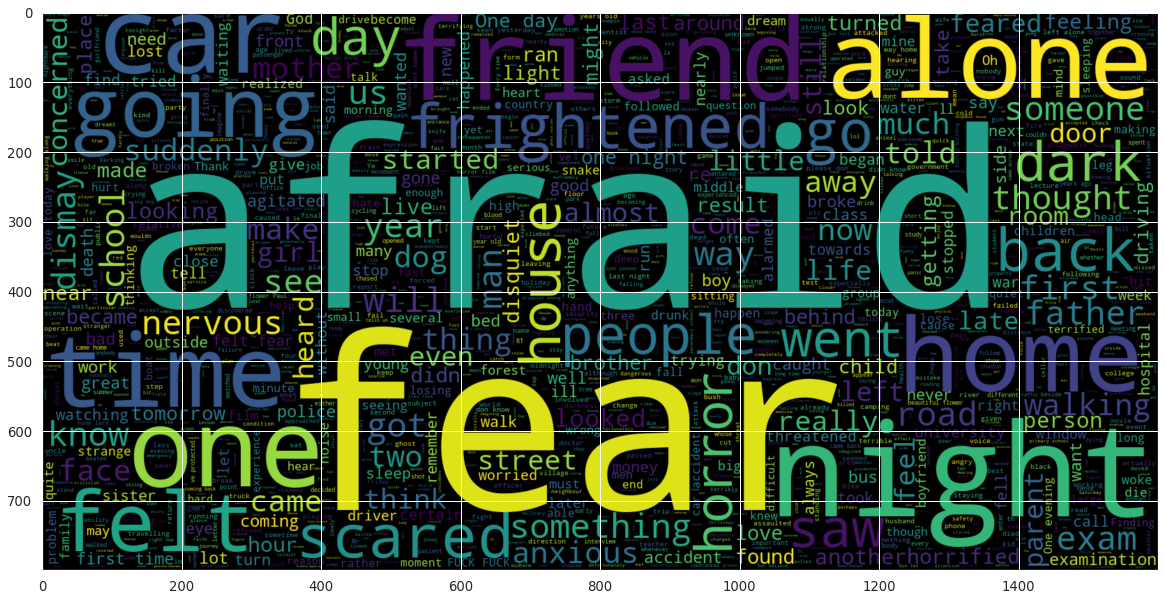

In [26]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Emotion == "fear"].Text))
plt.imshow(wc , interpolation = 'bilinear')

## Wordcloud for joy

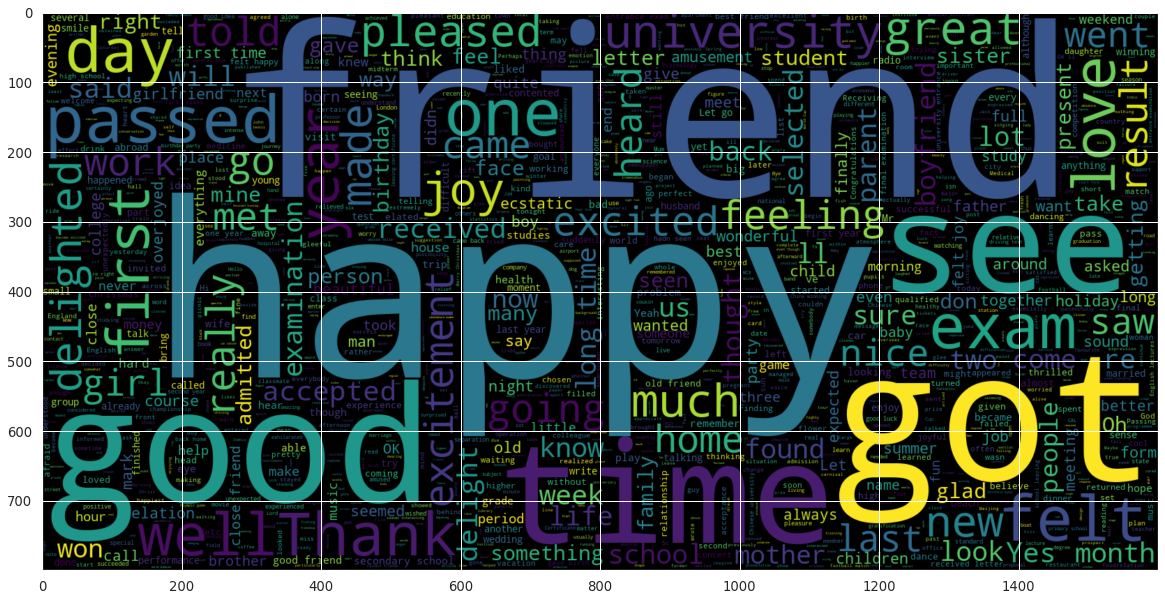

In [27]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Emotion == "joy"].Text))
plt.imshow(wc , interpolation = 'bilinear')

## Number of characters in texts

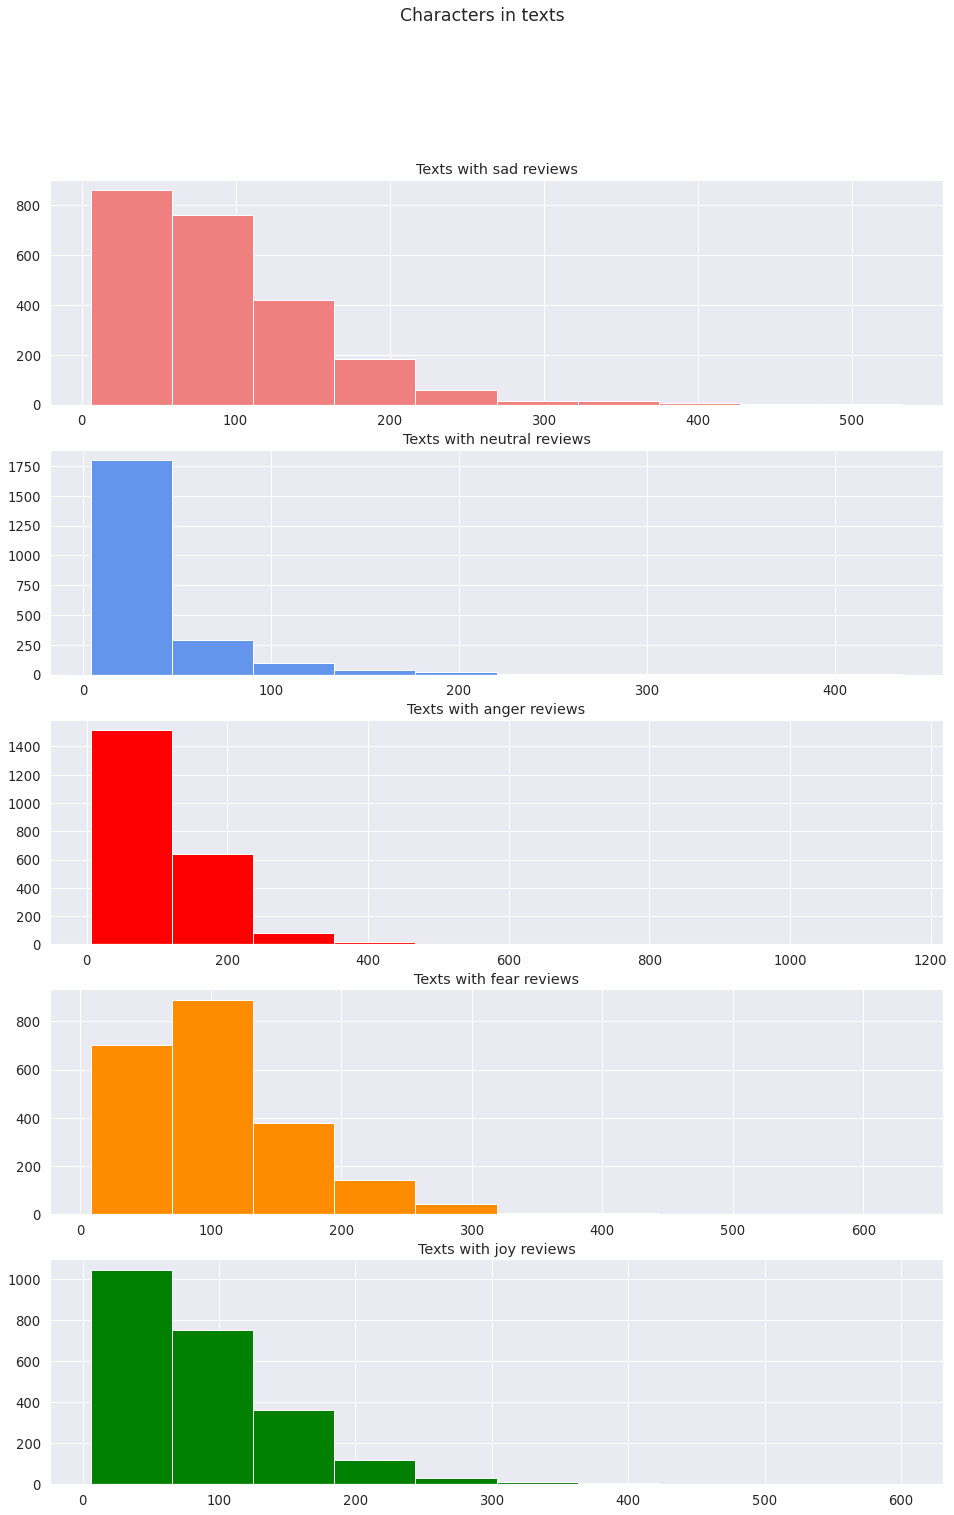

In [34]:
fig,(ax1,ax2, ax3, ax4, ax5)=plt.subplots(5,1,figsize=(16,24))
text_len=data[data['Emotion']=="sadness"]['Text'].str.len()
ax1.hist(text_len,color='lightcoral')
ax1.set_title('Texts with sad reviews')
text_len=data[data['Emotion']=="neutral"]['Text'].str.len()
ax2.hist(text_len,color='cornflowerblue')
ax2.set_title('Texts with neutral reviews')
text_len=data[data['Emotion']=="anger"]['Text'].str.len()
ax3.hist(text_len,color='red')
ax3.set_title('Texts with anger reviews')
text_len=data[data['Emotion']=="fear"]['Text'].str.len()
ax4.hist(text_len,color='darkorange')
ax4.set_title('Texts with fear reviews')
text_len=data[data['Emotion']=="joy"]['Text'].str.len()
ax5.hist(text_len,color='green')
ax5.set_title('Texts with joy reviews')
fig.suptitle('Characters in texts')
plt.show()

## Average word length in a text

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'Average word length in each text')

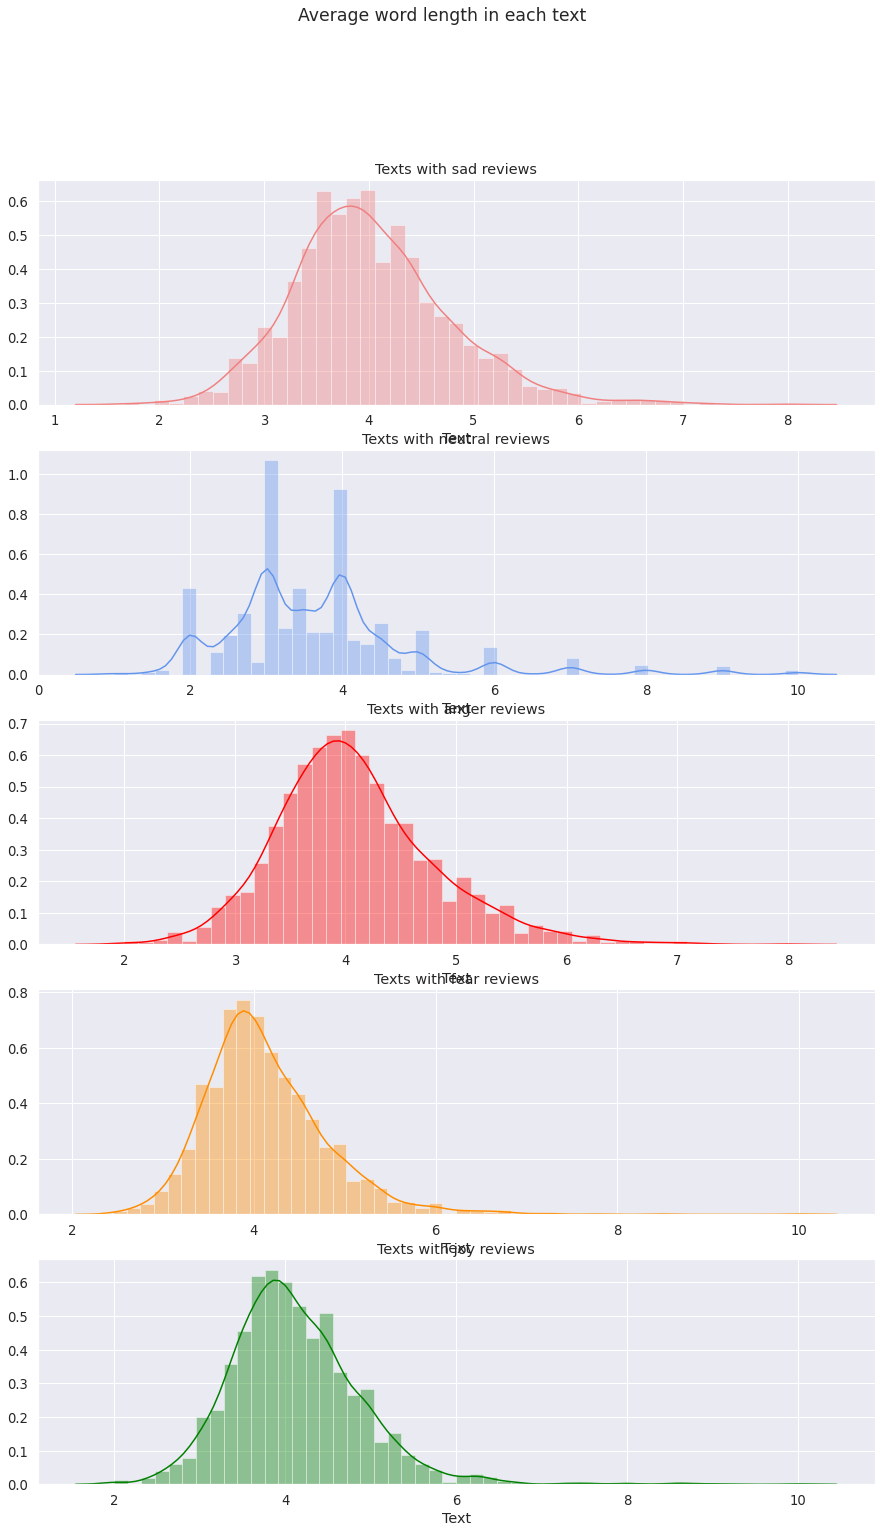

In [38]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(15,30))
word=data[data['Emotion']=="sadness"]['Text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='lightcoral')
ax1.set_title('Texts with sad reviews')
word=data[data['Emotion']=="neutral"]['Text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='cornflowerblue')
ax2.set_title('Texts with neutral reviews')
word=data[data['Emotion']=="anger"]['Text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='red')
ax3.set_title('Texts with anger reviews')
word=data[data['Emotion']=="fear"]['Text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax4,color='darkorange')
ax4.set_title('Texts with fear reviews')
word=data[data['Emotion']=="joy"]['Text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax5,color='green')
ax5.set_title('Texts with joy reviews')
fig.suptitle('Average word length in each text')